In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa

sns.set_style("darkgrid")

In [4]:
from pathlib import Path

PATH_DATA_RAW = Path("../data/raw").resolve()

PATH_DATA_RAW

PosixPath('/home/egor/Projects/Pycharm/kaggle-detect_sleep_states/data/raw')

In [11]:
COL_STEP = "step"
COL_ANGLEZ = "anglez"
COL_ENMO = "enmo"
COL_EVENT = "event"
COL_SERIES_ID = "series_id"

In [8]:
df_train_events = pd.read_csv(PATH_DATA_RAW / "train_events.csv")
df_train_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07T09:17:00-0400
14506,fe90110788d2,35,onset,NaN,NaN


In [40]:
def read_series(series_id: str, path_series_file: Path) -> pd.DataFrame:
    df = pa.parquet.read_table(
        path_series_file, 
        filters=[("series_id", "=", series_id)],
    ).to_pandas(timestamp_as_object=False, date_as_object=False)
    return df
    
df_series = read_series("038441c925bb", PATH_DATA_RAW / "train_series.parquet")
df_series

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
389875,038441c925bb,389875,2018-09-06T04:59:35-0400,-27.373899,0.0110
389876,038441c925bb,389876,2018-09-06T04:59:40-0400,-27.493799,0.0110
389877,038441c925bb,389877,2018-09-06T04:59:45-0400,-27.533701,0.0111
389878,038441c925bb,389878,2018-09-06T04:59:50-0400,-28.003599,0.0111


In [41]:
df_series.dtypes

series_id     object
step          uint32
timestamp     object
anglez       float32
enmo         float32
dtype: object

In [27]:
df_series.dtypes

series_id     object
step          uint32
timestamp     object
anglez       float32
enmo         float32
dtype: object

In [12]:
df_series_events = df_train_events.loc[df_train_events[COL_SERIES_ID]=="038441c925bb"]
df_series_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
5,038441c925bb,3,wakeup,44400.0,2018-08-17T05:10:00-0400
6,038441c925bb,4,onset,57240.0,2018-08-17T23:00:00-0400
7,038441c925bb,4,wakeup,62856.0,2018-08-18T06:48:00-0400
8,038441c925bb,5,onset,NaN,NaN
9,038441c925bb,5,wakeup,NaN,NaN


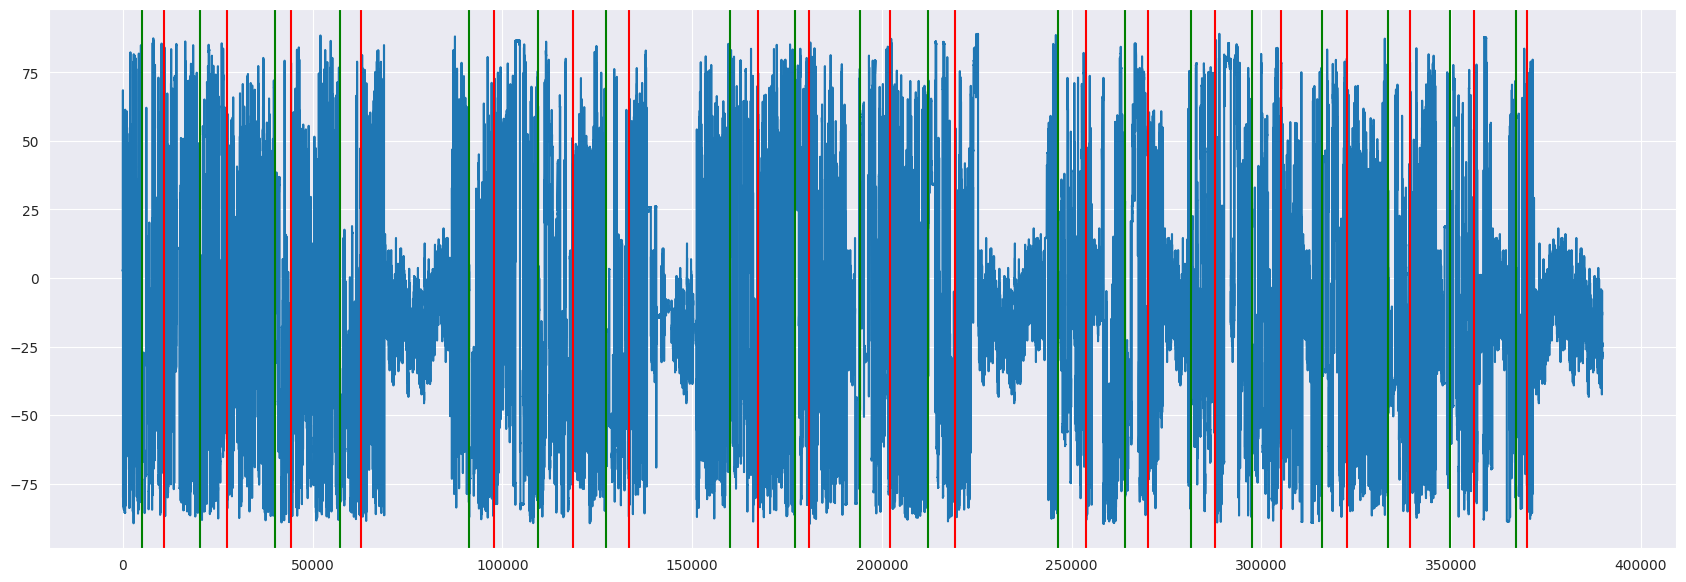

In [23]:
def plot_series(df_series: pd.DataFrame, df_series_events: pd.DataFrame, ax: plt.Axes):
    ax.plot(df_series[COL_STEP], df_series[COL_ANGLEZ], label=COL_ANGLEZ)
    #ax.plot(df_series[COL_STEP], df_series[COL_ANGLEZ], label=COL_ENMO)
    
    df_onset_events = df_series_events.loc[df_series_events[COL_EVENT]=="onset"]
    df_wakeup_events = df_series_events.loc[df_series_events[COL_EVENT]=="wakeup"]
    
    for step in df_onset_events[COL_STEP]:
        ax.axvline(step, color="green", label="onset")
    
    for step in df_wakeup_events[COL_STEP]:
        ax.axvline(step, color="red", label="wakeup")
    
fig, ax = plt.subplots(figsize=(21, 7))

plot_series(df_series, df_series_events=df_series_events, ax=ax)

<Axes: xlabel='anglez', ylabel='Count'>

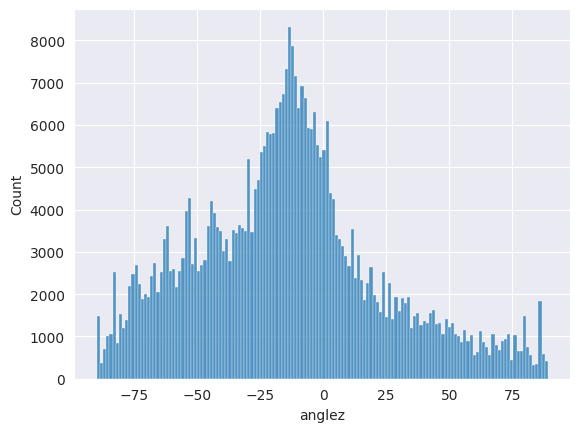

In [24]:
sns.histplot(data=df_series, x="anglez")